# ANS 1a)
<br>
The following code for convex quardratic function the fletcher reevs formula for linear system of equation reduces to liniear conjugate gradient method which is given by:
<br>
even though this algorithm ensures that the convergence will surely happen within n iterations for quadratic conves problem the culmination of round off error will lead to increase in the number of iterations.
<br>

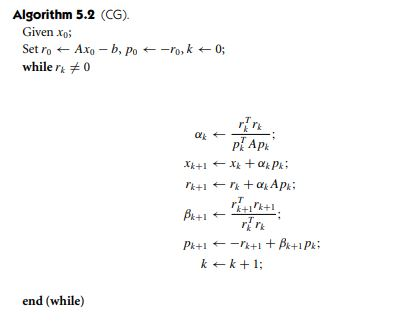


## Result
<br>

**number of iterations taken to solve dim=5 :5**
<br>

**number of iterations taken to solve dim=8 :18**
<br>

**number of iterations taken to solve dim=12 :36**
<br>

**number of iterations taken to solve dim=20 :71**



In [1]:
import numpy as np
import matplotlib.pyplot as plt
def hilmat(n):
    return [[1 / (i + j -1) for j in range(1,n+1)] for i in range(1,n+1)]
f= lambda x : 0.5*np.matmul(x.T,np.matmul(H,x))-np.matmul(b.T,x)
def CG(tol,n):
    H=hilmat(n)
    b=np.ones((len(H),1))
    xg=np.zeros((len(H),1))
    rg=np.matmul(H,xg)-b
    Pg=-rg
    itr=0
    maxitr=100
    for itr in range (0,maxitr):
        Pk=Pg
        xk=xg
        rk=rg
        s=np.matmul(H,Pk)
        αk=np.matmul(rk.T,rk)/np.matmul(Pk.T,s)
        xg=xk+αk*Pk
        rg=rk+αk*s
        βk=np.matmul(rg.T,rg)/np.matmul(rk.T,rk)
        Pg=-rg+βk*Pk
        norm=np.sum(np.power((rg),2))
        if (np.abs(np.sqrt(norm))<tol):
            break;
    return itr
tol=10**(-6)
sol1=CG(tol,5)
sol2=CG(tol,8)
sol3=CG(tol,12)
sol4=CG(tol,20)
print("*******************************************************************")
print("number of iterations taken to solve dim=5 :{} ".format(sol1))
print("number of iterations taken to solve dim=8 :{} ".format(sol2))
print("number of iterations taken to solve dim=12 :{} ".format(sol3))
print("number of iterations taken to solve dim=20 :{} ".format(sol4))
print("*******************************************************************")
            



*******************************************************************
number of iterations taken to solve dim=5 :5 
number of iterations taken to solve dim=8 :18 
number of iterations taken to solve dim=12 :36 
number of iterations taken to solve dim=20 :71 
*******************************************************************


# 1b)

As the number of itterations were large to see what effet does a preconditioner have SSOR and Jacobii pre  conditioners are tested. Preconditioners makes the hessian matrix more clustered in terms of eigen values which makes the traversing in conjugate direction a bit faster. 
If H is the Hessian matrix then D is the diagonal matrix just containing the diagonal elements of H and L is the lower triangular matrix contating the lower triangular elements of H then preconditioner M is given by :

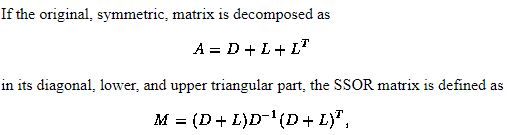

<br>

Precondition decreases the condition number of the Hessian Matrix such that:<br>
**K(M inv(H))<<K(H)** <br>
## Result 
using SSOR preconditioner<br>
**number of iterations taken to solve dim=5 :5 using preconditioner**<br>
**number of iterations taken to solve dim=8 :16 using preconditioner**<br>
**number of iterations taken to solve dim=12 :30 using preconditioner**<br> 
**number of iterations taken to solve dim=20 :50using preconditioner** <br>

**We can observe that the number od iterations required decresed by a significant number for higher dimensions furthur decrease can be obtained by using more efficient preconditioners such as Incomplete Cholesky Decomposition**










In [2]:
'''selecting jacobii pre conditioner'''
# def precod(n): 
#     h= [[1 / (i + j -1) for j in range(1,n+1)] for i in range(1,n+1)]   
#     dd=np.diag(h)
#     M=np.diag(dd)
#     return M
'''SSOR preconditioner'''
def precod(n): 
    h= [[1 / (i + j -1) for j in range(1,n+1)] for i in range(1,n+1)]   
    dd=np.diag(h)
    D=np.diag(dd)
    L=np.tril(h)
    DL=(D+L)
    M=np.matmul(DL,np.matmul(np.linalg.inv(D),DL.T))
    return M
def PCG(tol,n):
    H=hilmat(n)
    M=precod(n)
    M_inv=np.linalg.inv(M)
    A=np.linalg.cond(hilmat(n))
    B=np.linalg.cond(np.matmul(M_inv,hilmat(n)))
    b=np.ones((len(H),1))
    xg=np.zeros((len(H),1))
    rg=np.matmul(H,xg)-b
    Pg=-np.matmul(M_inv,rg)
    itr=0
    maxitr=50
    for itr in range (0,maxitr):
        Pk=Pg
        xk=xg
        rk=rg
        s=np.matmul(H,Pk)
        αk=np.matmul(rk.T,np.matmul(M_inv,rk))/np.matmul(Pk.T,s)
        xg=xk+αk*Pk
        rg=rk+αk*s
        βk=np.matmul(rg.T,np.matmul(M_inv,rg))/np.matmul(rk.T,np.matmul(M_inv,rk))
        Pg=-np.matmul(M_inv,rg)+βk*Pk
        norm=np.sum(np.power((rg),2))
        itr+=1
        if (np.abs(np.sqrt(norm))<tol):
            break;
    return itr
tol=10**(-6)
sol1=PCG(tol,5)
sol2=PCG(tol,8)
sol3=PCG(tol,12)
sol4=PCG(tol,20)
print("*******************************************************************")
print("number of iterations taken to solve dim=5 :{} using preconditioner ".format(sol1))
print("number of iterations taken to solve dim=8 :{} using preconditioner ".format(sol2))
print("number of iterations taken to solve dim=12 :{} using preconditioner ".format(sol3))
print("number of iterations taken to solve dim=20 :{}using preconditioner   ".format(sol4))
print("*******************************************************************")


*******************************************************************
number of iterations taken to solve dim=5 :5 using preconditioner 
number of iterations taken to solve dim=8 :16 using preconditioner 
number of iterations taken to solve dim=12 :30 using preconditioner 
number of iterations taken to solve dim=20 :50using preconditioner   
*******************************************************************


# 1c)
 Random matrices of various dimensions are created and then those matrices are clustered n terms of eigen values by obtaining SSOR preconditioners for those matrices such that we will obtain random not-clustured .i.e. sparse and clustered matrices then conjugate gradient method is applied on both of them to see the number of iterations taken to converge.<br>
 ## Result
<br>
using sparse<br>
number of iteration taken to solve 7*7 sparse matrix: 7<br>
using cluster<br>
number of iteration taken to solve 7*7 dim clustered  matrix: 6<br>
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
using sparse<br>
number of iteration taken to solve 9*9 sparse matrix: 9<br>
using cluster<br>
number of iteration taken to solve 9*9 dim clustered  matrix: 8<br>
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
using sparse<br>
number of iteration taken to solve 11*11 sparse matrix: 11<br>
using cluster<br>
number of iteration taken to solve 11*11 dim clustered  matrix: 9<br>
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
using sparse<br>
number of iteration taken to solve 15*15 sparse matrix: 17<br>
using cluster<br>
number of iteration taken to solve 15*15 dim clustered  matrix: 11<br>
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
using sparse<br>
number of iteration taken to solve 25*25 sparse matrix: 33<br>
using cluster<br>
number of iteration taken to solve 25*25 dim clustered  matrix: 12<br>

**We can observe that the CG method takes less number of iterations to converge for clustered matrices of same dimension than non- clustered matrices**


In [236]:
'''creating random positive definate matrices'''
def mat(n): 
    A = np.random.rand(n,n)
    B = np.dot(A, A.transpose())
    return B
'''making the eigen values of the created matrix more clustered'''
def clust(n): 
    h= mat(n)  
    dd=np.diag(h)
    D=np.diag(dd)
    L=np.tril(h)
    DL=(D+L)
    H=np.matmul(DL,np.matmul(np.linalg.inv(D),DL.T))
#     H=np.matmul(np.linalg.inv(M),h)
    return H
def CG(tol,n,t):
    if t==0:
        H=mat(n)
        print("using sparse")
    else:
        H=clust(n)
        print("using cluster")
    b=np.ones((len(H),1))
    xg=np.zeros((len(H),1))
    rg=np.matmul(H,xg)-b
    Pg=-rg
    itr=0
    maxitr=500 
    for itr in range (0,maxitr):
        Pk=Pg
        xk=xg
        rk=rg
        s=np.matmul(H,Pk)
        αk=np.matmul(rk.T,rk)/np.matmul(Pk.T,s)
        xg=xk+αk*Pk
        rg=rk+αk*s
        βk=np.matmul(rg.T,rg)/np.matmul(rk.T,rk)
        Pg=-rg+βk*Pk
        norm=np.sum(np.power((rg),2))
        if (np.abs(np.sqrt(norm))<tol):
            break;
    return itr
tol=10**(-6)
dim=[7,9,11,15,25]
for n in dim:
    H=mat(n)
    C=clust(n)
#checking the condition numberof both sparse and clustered matrices to check clustering of eigen values
    K1=np.linalg.cond(H)
    K2=np.linalg.cond(C)
    print("----------------------------------------------------------------------------------------------------")
    sol1=CG(tol,n,0)
    print("number of iteration taken to solve {}*{} sparse matrix: {}".format(n,n,sol1))
    sol2=CG(tol,n,1)
    print("number of iteration taken to solve {}*{} dim clustered  matrix: {}".format(n,n,sol2))
    print("----------------------------------------------------------------------------------------------------")

----------------------------------------------------------------------------------------------------
using sparse
number of iteration taken to solve 7*7 sparse matrix: 7
using cluster
number of iteration taken to solve 7*7 dim clustered  matrix: 6
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
using sparse
number of iteration taken to solve 9*9 sparse matrix: 9
using cluster
number of iteration taken to solve 9*9 dim clustered  matrix: 8
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
using sparse
number of iteration taken to solve 11*11 sparse matrix: 11
using cluster
number of iteration taken to solve 11*11 dim clustered  matrix: 9
-------------------------------------------------

# 1d)
Hessian Matrix was obtained from the data and model given and optimum n =8 was applied which was obtained from assignment 1 is used to solve system of equation<br>
$$AX=b$$<br>
by formulating as least square problem and implementing conjugate gradient method. The value of parameter X for n=8 was obtatined and then using those parameter Fitted  value Y is obtained which later compared with the Y value given by the Model and MSE(mean square error was obtained) as follows:<br>
## Result
<br>

value of coefficients of model: <br>[[-3.15014543e+00]<br>
 [ 3.56367815e-01]<br>
 [-1.55590438e-02]<br>
 [ 3.16761015e-04]<br>
 [-2.53296941e-06]<br>
 [-8.06103062e-09]<br>
 [ 2.45370199e-10]<br>
 [-1.05456473e-12]]<br>
-------------------------------------------------------
----------------------------------------------------------------------------------------------------<br>
the least square problem is solved using conjugate gradient with MSE <br>:0.0002573392948232657<br>
----------------------------------------------------------------------------------------------------<br>

In [3]:
X= np.load('data_x.npy')
mu=np.mean(X)
std=np.std(X)
y=1/(std*np.sqrt(2*np.pi))*np.exp(-(X-mu)**2/(2*std**2))
Y=y[0:1000]
j=np.ones((len(X),1))
opt=8
for i in range (1,opt):
        j=np.concatenate((j,np.array([np.power(X,i)]).T),axis=1)
H=np.matmul(j.T,j)
b=np.array([np.matmul(j.T,Y)])
f= lambda x : 0.5*np.matmul(x.T,np.matmul(H,x))-np.matmul(b,x).item()
def CG(tol,H,b):
    xg=np.zeros((len(H),1))
    rg=np.matmul(H,xg)-b.T
    Pg=-rg
    itr=0
    maxitr=600
    xval=[]
    xval.append(xg)
    for itr in range (0,maxitr):
        Pk=Pg
        xk=xg
        rk=rg
        s=np.matmul(H,Pk)
        αk=np.matmul(rk.T,rk)/np.matmul(Pk.T,s)
        xg=xk+αk*Pk
        xval.append(xg)
        rg=rk+αk*s
        βk=np.matmul(rg.T,rg)/np.matmul(rk.T,rk)
        Pg=-rg+βk*Pk
        norm=np.sum(np.power((rg),2))
        if (np.abs(np.sqrt(norm))<tol):
            break;
    return xval,itr,
tol=10**(-6)
xval,niter=CG(tol,H,b)
beta=xval[-1]
print("-------------------------------------------------------")
print("value of coefficients of model: {}".format(beta))
print("-------------------------------------------------------")
y_fit=np.matmul(j,beta)
MSE=(np.mean(((y_fit-Y)**2)))
print("----------------------------------------------------------------------------------------------------")
print("the least square problem is solved using conjugate gradient with MSE :{}".format(MSE))
print("----------------------------------------------------------------------------------------------------")

-------------------------------------------------------
value of coefficients of model: [[-3.15014543e+00]
 [ 3.56367815e-01]
 [-1.55590438e-02]
 [ 3.16761015e-04]
 [-2.53296941e-06]
 [-8.06103062e-09]
 [ 2.45370199e-10]
 [-1.05456473e-12]]
-------------------------------------------------------
----------------------------------------------------------------------------------------------------
the least square problem is solved using conjugate gradient with MSE :0.0002573392948232657
----------------------------------------------------------------------------------------------------


# ANS-2a)

In Trust Region Method to Solve a quadratic problem we simultaneously progress wit step length and direction unlike liner search method which search direction is decided first which is followed by the descision o the step length. In Trust region method the given function is modeled as quadratic approximation mk whixh has to be solved as a subproblem at each step of the iteration. The trust radius and direction Pk is selected such a way that it solves the subprolem and minimizes the subproblem at each step. The most simple way to procees in each iteration is through cauchy points as it is just steepest descent direction it may take more number of iterations so we improve on cauchy point by different ways one of them is Dogleg method.<br>

**DOGLEG METHOD**<br>
It can be used when Hessian is a positive definate Matrix or else modified newto method is used i which the hessian is modified to be positive definate. For lower value of trust radius the model mk is approximated as linear function whereas for intermediate value of Trust radius the path will be curved which is approximated by two straight line looking like dogs leg.
it give us the value of Pk (step length) which can be used in Trust region algorithm shown below.<br>

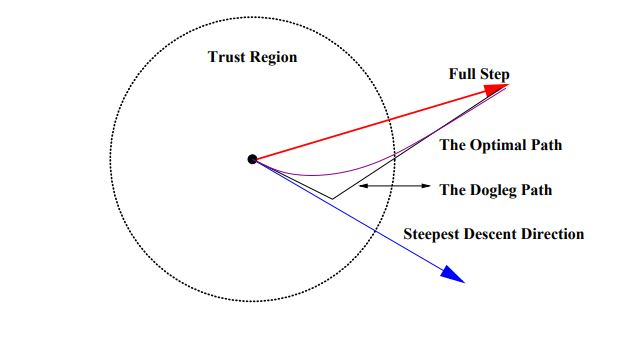







**TRUST REGION**<br>

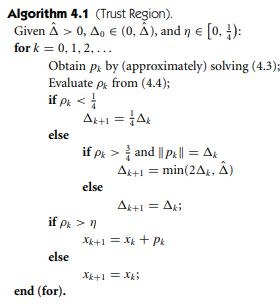

In [1]:
import numpy as np
import numpy.linalg as ln
import scipy as sp
from math import sqrt
import matplotlib.pyplot as plt
# Objective function    
f=lambda x:(1-x[0])**2 + 100*(x[1]-x[0]**2)**2
# Gradient
jac=lambda x : np.array([-400*(x[1] - x[0]**2)*x[0] - 2 + 2*x[0], 200*x[1] - 200*x[0]**2])
# Hessian
hess=lambda x:np.array([[1200*x[0]**2 - 400*x[1]+2, -400*x[0]], [-400*x[0], 200]])
#model


In [2]:
def dogleg_method(Hk, gk, Bk, trust_radius):

    pB = -np.dot(Hk, gk)
    norm_pB = sqrt(np.dot(pB, pB))
    # Test if the full step is within the trust region.
    if norm_pB <= trust_radius:
        return pB
    
    # Compute the Cauchy point.
    # This is the predicted optimum along the direction of steepest descent.
    pU = - (np.dot(gk, gk) / np.dot(gk, np.dot(Bk, gk))) * gk
    dot_pU = np.dot(pU, pU)
    norm_pU = sqrt(dot_pU)

    # If the Cauchy point is outside the trust region,
    # then return the point where the path intersects the boundary.
    if norm_pU >= trust_radius:
        return trust_radius * pU / norm_pU
    pB_pU = pB - pU
    dot_pB_pU = np.dot(pB_pU, pB_pU)
    dot_pU_pB_pU = np.dot(pU, pB_pU)
    fact = dot_pU_pB_pU**2 - dot_pB_pU * (dot_pU - trust_radius**2)
    tau = (-dot_pU_pB_pU + sqrt(fact)) / dot_pB_pU
    
    # Decide on which part of the trajectory to take.
    return pU + tau * pB_pU

**The Rosenbrock's function** <br>
$$f(x,y)=(1-x)^2+100(y-x^2)^2$$

is solved using Trust region Method taking folowing input:<br>
**initial Trust Radius = 1.0**<br>
**Initial Guess = [1.5,1.5]**<br>
**maximum Trust Radius =100**<br>
**eta=0.2**<br>
**roh_max=0.75**<br>
## Result

**total number of iterations taken: 13**<br>
**Result of trust region dogleg method: [1. 1.]**<br>
**Value of function at a point: 9.486052385282667e-29**<br>
The detailed iteration result is shown below 

In [3]:
def trust_region_dogleg(func, jac, hess, x0, initial_trust_radius=1.0,
                        max_trust_radius=100.0, eta=0.2, gtol=1e-6, 
                        maxiter=100,rho_L=0.25,rho_H=0.75):
    xval=[]
    iter_x=[]
    iter_y=[]
    TR=[]
    p_k=[]
    itr=[]
    xk = x0
    x,y=xk[0],xk[1]
    iter_x.append(x)
    iter_y.append(y)
    xval.append(xk)
    trust_radius = initial_trust_radius
    TR.append(trust_radius)
    k = 0
    itr.append(k)
    while True:
      
        gk = jac(xk)
        Bk = hess(xk)
        Hk = np.linalg.inv(Bk)
        
        pk = dogleg_method(Hk, gk, Bk, trust_radius)
        p_k.append(pk)
        # Actual reduction.
        act_red = func(xk) - func(xk + pk)
        # Predicted reduction.
        pred_red = -(np.dot(gk, pk) + 0.5 * np.dot(pk, np.dot(Bk, pk)))
        # Rho.
        rhok = act_red / pred_red
        if pred_red == 0.0:
            rhok = 1e99
        else:
            rhok = act_red / pred_red
            
        # Calculate the Euclidean norm of pk.
        norm_pk = sqrt(np.dot(pk, pk))
        # Rho is close to zero or negative, therefore the trust region is shrunk.
        if rhok < rho_L:
            trust_radius = 0.25 * norm_pk
            TR.append(trust_radius)
        else: 
        # Rho is close to one and pk has reached the boundary of the trust region, therefore the trust region is expanded.
            if rhok > rho_H and norm_pk == trust_radius:
                trust_radius = min(2.0*trust_radius, max_trust_radius)
                TR.append(trust_radius)
            else:
                trust_radius = trust_radius
                TR.append(trust_radius)
        # Choose the position for the next iteration.
        if rhok > eta:
            xk = xk + pk
            x,y=xk[0],xk[1]
            iter_x.append(x)
            iter_y.append(y)
            xval.append(xk)
        else:
            xk = xk
            xval.append(xk)
            x,y=xk[0],xk[1]
            iter_x.append(x)
            iter_y.append(y)
        # Check if the gradient is small enough to stop
        if ln.norm(gk) < gtol:
            break
        
        # Check if we have looked at enough iterations
        if k >= maxiter:
            break
        k = k + 1
        itr.append(k)
    return itr,xval,TR,p_k,iter_x,iter_y        
niter,x_val,trust_r,step_l,iter_x,iter_y = trust_region_dogleg(f, jac, hess, [1.5, 1.5])
print("total number of iterations taken: {}".format(niter[-1]))
print("Result of trust region dogleg method: {}".format(x_val[-1]))
# print("Result of trust radiuses : {}".format(trust_r[-1]))
print("Value of function at a point: {}".format(f(x_val[-1])))
niter.insert(0,0)
step_l.insert(0,0)

total number of iterations taken: 13
Result of trust region dogleg method: [1. 1.]
Value of function at a point: 9.486052385282667e-29


In [4]:
import pandas as pd 
dictionary = {'iteration': niter, 'xk': x_val, 'Pk': step_l,'Trust radius':trust_r}  
dataframe = pd.DataFrame(dictionary) 
dataframe.to_csv('Trust.csv')
pnt2=pd.read_csv('Trust.csv',index_col=0)
print("the detail of Trust region method   :\n")
pnt2

the detail of Trust region method   :



,iteration,xk,Pk,Trust radius
0,0,"[1.5, 1.5]",0,1.000000
1,0,[1.49668874 2.24006623],[-0.00331126 0.74006623],1.000000
2,1,[1.49668874 2.24006623],[-0.31704004 -0.94841215],0.250000
3,2,[1.41705304 2.00308911],[-0.07963571 -0.23697712],0.500000
4,3,[1.2490475 1.53216009],[-0.16800554 -0.47092902],0.500000
5,4,[1.21126673 1.4657397 ],[-0.03778077 -0.06642039],0.500000
6,5,[1.21126673 1.4657397 ],[-0.16434886 -0.39671324],0.107352
7,6,[1.16959533 1.36680543],[-0.0416714 -0.09893427],0.214704
8,7,[1.08469295 1.16960104],[-0.08490238 -0.19720439],0.429409
9,8,[1.04927954 1.09973343],[-0.03541341 -0.06986761],0.429409


-------------------converging Solution---------------------------------------------------


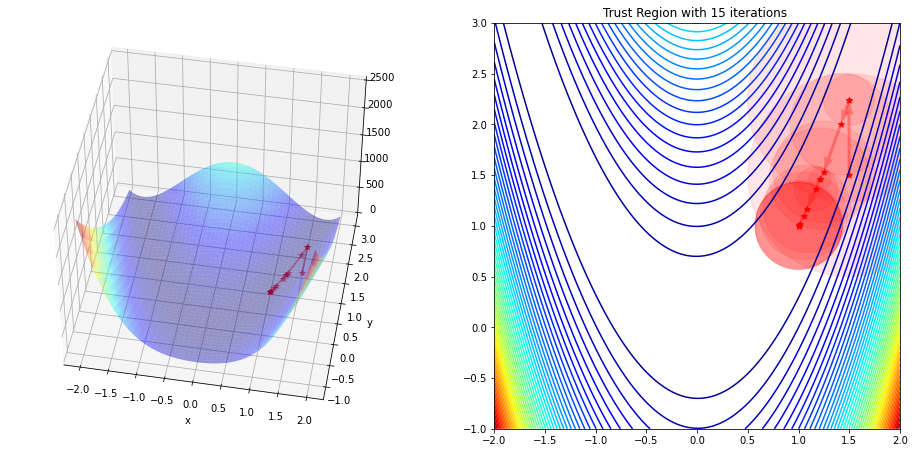

In [5]:
'''plotting contours'''
x = np.linspace(-2,2,250)
y = np.linspace(-1,3,250)
X, Y = np.meshgrid(x, y)
Z = f(np.array([X, Y]))

fig = plt.figure(figsize = (16,8))

#Angles needed for quiver plot
anglesx = np.array(iter_x[1:]) - np.array(iter_x[:-1])
anglesy = np.array(iter_y[1:]) - np.array(iter_y[:-1])
print("-------------------converging Solution---------------------------------------------------")

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.plot(iter_x,iter_y, f(np.array([iter_x,iter_y])),color = 'r', marker = '*', alpha = .4)
ax.view_init(45, 280)
ax.set_xlabel('x')
ax.set_ylabel('y')

#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X,Y,Z, 50, cmap = 'jet')
#Plotting the iterations and intermediate values
ax.scatter(iter_x,iter_y,color = 'r', marker = '*')
ax.quiver(iter_x[:-1], iter_y[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
ax.set_title('Trust Region with {} iterations '.format(len(niter)))
for i in range (len(iter_x)):
    Drawing_colored_circle = plt.Circle(( iter_x[i] ,iter_y[i]),trust_r[i],color='red',alpha=0.1) 
    ax.set_aspect( 1 )
    ax.add_artist( Drawing_colored_circle)
plt.show()


## Ans
**when value of rho_max is changed from 0.75 to 0.8 and roh_min is changed to 0.01 in the updates the solution diverges which can be seen from results and contour below**


---------------------------updating steps with diffrent value of roh_H=0.8  & roh_L=0.01 instead of 0.75 -----------------------
total number of iterations taken: 100
Result of trust region dogleg method: [1.71089523 2.91789039]
--------------------------------------Increased Number of iterations (Diverged)-------------------------------- -----------------------


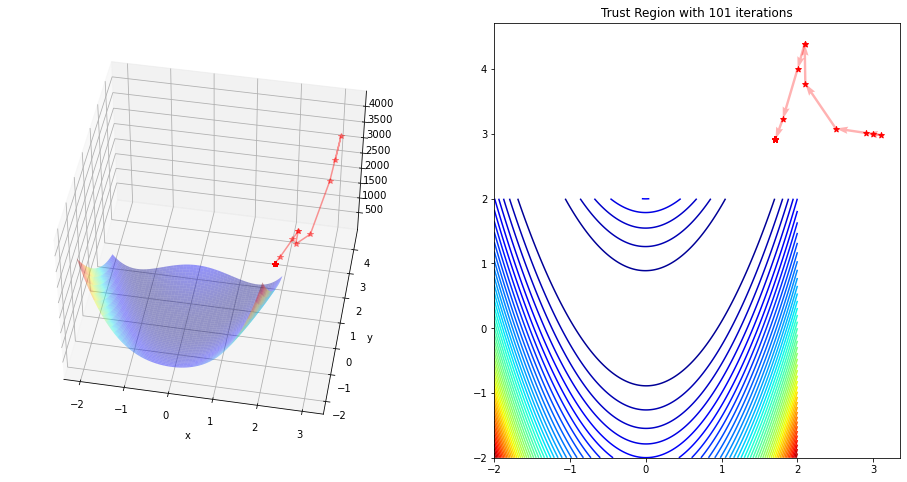

In [6]:
rho_H=0.8
rho_L=0.01
niter,x_val,trust_r,step_l,iter_x,iter_y = trust_region_dogleg(f, jac, hess, [3, 3],initial_trust_radius=0.1,
                        max_trust_radius=2.0, eta=0.2, gtol=1e-6, 
                        maxiter=100,rho_L=0.01,rho_H=0.8)
print("---------------------------updating steps with diffrent value of roh_H={}  & roh_L={} instead of 0.75 -----------------------".format(rho_H,rho_L))
print("total number of iterations taken: {}".format(niter[-1]))
print("Result of trust region dogleg method: {}".format(x_val[-1]))
print("--------------------------------------Increased Number of iterations (Diverged)-------------------------------- -----------------------")
'''plotting contours'''
x = np.linspace(-2,2,250)
y = np.linspace(-2,2,250)
X, Y = np.meshgrid(x, y)
Z = f(np.array([X, Y]))

fig = plt.figure(figsize = (16,8))

#Angles needed for quiver plot
anglesx = np.array(iter_x[1:]) - np.array(iter_x[:-1])
anglesy = np.array(iter_y[1:]) - np.array(iter_y[:-1])

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.plot(iter_x,iter_y, f(np.array([iter_x,iter_y])),color = 'r', marker = '*', alpha = .4)
ax.view_init(45, 280)
ax.set_xlabel('x')
ax.set_ylabel('y')

#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X,Y,Z, 50, cmap = 'jet')
#Plotting the iterations and intermediate values
ax.scatter(iter_x,iter_y,color = 'r', marker = '*')
ax.quiver(iter_x[:-1], iter_y[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
ax.set_title('Trust Region with {} iterations'.format(len(niter)))
plt.show()


## ANS
**when value of eta is changed from 0.25 to 0.75  in the updates the solution diverges which can be seen from results and contour below**

---------------------------updating steps with diffrent value of eta=0.75   instead of 0.25 -----------------------
total number of iterations taken: 100
Result of trust region dogleg method: [2.00276499 4.00473602]
---------------------------Increased Number of iterations (Diverged) ------------------------------------------- -----------------------


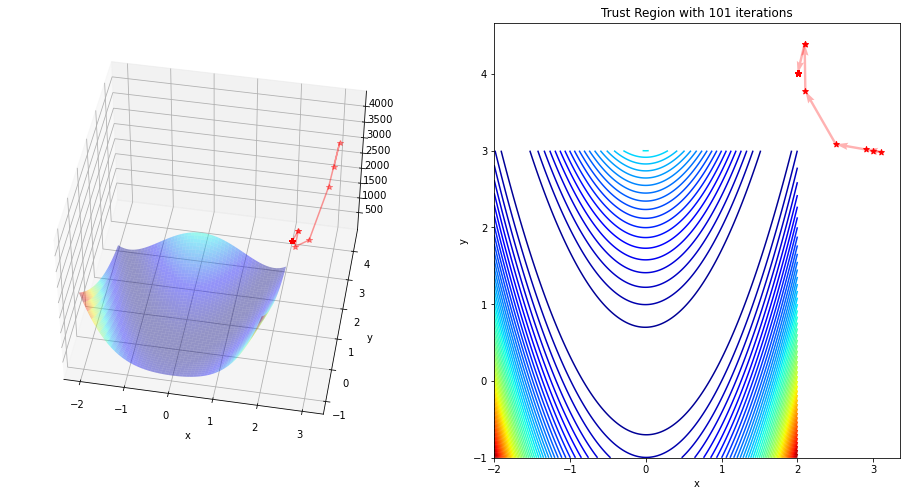

In [7]:
eta=0.75
niter,x_val,trust_r,step_l,iter_x,iter_y = trust_region_dogleg(f, jac, hess, [3, 3],initial_trust_radius=0.1,
                        max_trust_radius=2.0, eta=0.75, gtol=1e-6, 
                        maxiter=100,rho_L=0.25,rho_H=0.75)
print("---------------------------updating steps with diffrent value of eta={}   instead of 0.25 -----------------------".format(eta))
print("total number of iterations taken: {}".format(niter[-1]))
print("Result of trust region dogleg method: {}".format(x_val[-1]))
print("---------------------------Increased Number of iterations (Diverged) ------------------------------------------- -----------------------")
'''plotting contours'''
x = np.linspace(-2,2,250)
y = np.linspace(-1,3,250)
X, Y = np.meshgrid(x, y)
Z = f(np.array([X, Y]))

fig = plt.figure(figsize = (16,8))

#Angles needed for quiver plot
anglesx = np.array(iter_x[1:]) - np.array(iter_x[:-1])
anglesy = np.array(iter_y[1:]) - np.array(iter_y[:-1])

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.plot(iter_x,iter_y, f(np.array([iter_x,iter_y])),color = 'r', marker = '*', alpha = .4)
ax.view_init(45, 280)
ax.set_xlabel('x')
ax.set_ylabel('y')

#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X,Y,Z, 50, cmap = 'jet')
#Plotting the iterations and intermediate values
ax.scatter(iter_x,iter_y,color = 'r', marker = '*')
ax.quiver(iter_x[:-1], iter_y[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
ax.set_title('Trust Region with {} iterations'.format(len(niter)))
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()


# ANS 2b)
for function $$f(x,y)=(1-x)^2+20(y-x^2)^2$$<br>
and its contour is ploteed.
 Quadratic model is approximated as 
  $$mk=\frac{1}{2}x^THx+x^Tg$$ <br>
  for this quadratic model contour is plotted and shown below. on that contour taking intial guess as (0,-1) and (0,0.5) and trust radius from 0 to 2 obtained solution values were plotted and shown below.

Text(0, 0.5, 'y')

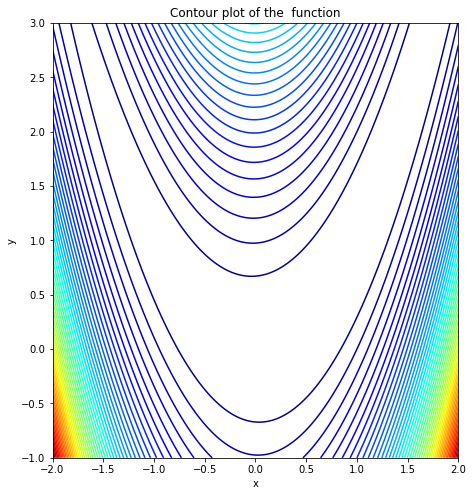

In [8]:
f1=lambda x:(1-x[0])**2 + 20*(x[1]-x[0]**2)**2
# Gradient
jac1=lambda x: np.array([-80*(x[1] - x[0]**2)*x[0] - 2 + 2*x[0], 40*x[1] - 40*x[0]**2])
# Hessian
hess1=lambda x:np.array([[240*x[0]**2 - 80*x[1]+2, -80*x[0]], [-80*x[0], 40]]) 
'''printing the contour of function'''
P=np.array(x_val)
x = np.linspace(-2,2,250)
y = np.linspace(-1,3,250)
X, Y = np.meshgrid(x, y)
Z = f1(np.array([X, Y]))
np.shape(Z)
#Angles needed for quiver plot
anglesx = np.array(iter_x[1:]) - np.array(iter_x[:-1])
anglesy = np.array(iter_y[1:]) - np.array(iter_y[:-1])
# Contour plot
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
plt.contour(X,Y,Z, 50, cmap = 'jet')  
ax.set_title('Contour plot of the  function')
ax.set_xlabel('x')
ax.set_ylabel('y')


**Taking initial guess as (0,-1) plots and solution values are shown below**


the detail of Trust region method   :

                          xk  Trust radius
0  [ 0.00998752 -0.80024953]           0.2
1  [ 0.01997505 -0.60049906]           0.4
2  [ 0.02996257 -0.4007486 ]           0.6
3  [ 0.03995009 -0.20099813]           0.8
4  [ 0.02829697 -0.00040044]           1.0
5    [0.02439024 0.        ]           1.2
6    [0.02439024 0.        ]           1.4
7    [0.02439024 0.        ]           1.6
8    [0.02439024 0.        ]           1.8
9    [0.02439024 0.        ]           2.0


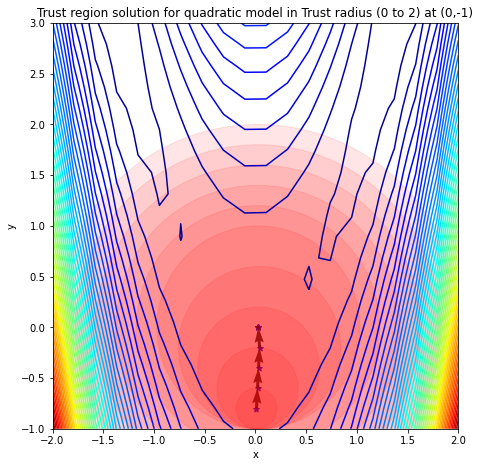

In [11]:
m =lambda x: f1(x)+(-80*(x[1] - x[0]**2)*x[0] - 2 + 2*x[0])*x[0]+(40*x[1] - 40*x[0]**2)*x[1]+0.5*(x[0]*((240*x[0]**2 - 80*x[1]+2)*x[0]-80*x[0]*x[1])+x[1]*(-80*x[0]**2+40*x[1]))
def Ttest_trust(func, jac, hess, xk, initial_trust_radius=1.0,max_trust_radius=2 ,eta=0.2,rho_L=0.25,rho_H=0.75):
    iter_x=[]
    iter_y=[]
    trust_radius = initial_trust_radius
    gk = jac(xk)
    Bk = hess(xk)
    Hk = np.linalg.inv(Bk)
        
    pk = dogleg_method(Hk, gk, Bk, trust_radius)
    # Actual reduction.
    act_red = func(xk) - func(xk + pk)
    # Predicted reduction.
    pred_red = -(np.dot(gk, pk) + 0.5 * np.dot(pk, np.dot(Bk, pk)))
    # Rho.
    rhok = act_red / pred_red
    if pred_red == 0.0:
        rhok = 1e99
    else:
        rhok = act_red / pred_red
            
    # Calculate the Euclidean norm of pk.
    norm_pk = sqrt(np.dot(pk, pk))
    # Rho is close to zero or negative, therefore the trust region is shrunk.
    if rhok < rho_L:
        trust_radius = 0.25 * norm_pk
    else: 
    # Rho is close to one and pk has reached the boundary of the trust region, therefore the trust region is expanded.
        if rhok > rho_H and norm_pk == trust_radius:
            trust_radius = min(2.0*trust_radius, max_trust_radius)
        else:
            trust_radius = trust_radius
    # Choose the position for the next iteration.
    if rhok > eta:
        xk = xk + pk
        x,y=xk[0],xk[1]
        iter_x.append(x)
        iter_y.append(y)
    else:
        xk = xk
        x,y=xk[0],xk[1]
        iter_x.append(x)
        iter_y.append(y)
    return xk,iter_x,iter_y
sol=[]
sol_x=[]
sol_y=[]
dis=[0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2]
for i in dis:
    x_val,iter_x,iter_y=Ttest_trust(m, jac1, hess1, [0, -1], initial_trust_radius=i,eta=0.2,rho_L=0.25,rho_H=0.75)
    sol.append(x_val)
    sol_x.append(iter_x)
    sol_y.append(iter_y)
# print(sol,sol_x,sol_y)
# niter.insert(0,0)
# step_l.insert(0,0)
# import pandas as pd 
dictionary = { 'xk': sol ,'Trust radius':dis}  
dataframe = pd.DataFrame(dictionary) 
dataframe.to_csv('Trust.csv')
pnt2=pd.read_csv('Trust.csv',index_col=0)
print("the detail of Trust region method   :\n")
print(pnt2)
'''contour plot of the model and solutions'''
x = np.linspace(-2,2,20)
y = np.linspace(-1,3,20)
X, Y = np.meshgrid(x, y)
Z = m(np.array([X, Y]))
np.shape(Z)
#Angles needed for quiver plot
anglesx = np.array(sol_x[1:]) - np.array(sol_x[:-1])
anglesy = np.array(sol_y[1:]) - np.array(sol_y[:-1])
# Contour plot
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
plt.contour(X,Y,Z, 50, cmap = 'jet')    
ax.scatter(sol_x,sol_y,color = 'b', marker = '*')
ax.quiver(sol_x[:-1], sol_y[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'k', alpha = .8)
ax.set_title('Trust region solution for quadratic model in Trust radius (0 to 2) at (0,-1)')
ax.set_xlabel('x')
ax.set_ylabel('y')
for i in range (len(sol_x)):
    Drawing_colored_circle = plt.Circle(( sol_x[i] ,sol_y[i]),dis[i],color='red',alpha=0.1) 
    ax.set_aspect( 1 )
    ax.add_artist( Drawing_colored_circle)
plt.show()



**Taking initial guess as (0,0.5) plots and solution values are shown below**

the detail of Trust region method   :

                          xk  Trust radius
0    [0.01990074 0.30099256]           0.2
1    [0.03980149 0.10198512]           0.4
2  [-0.05263158  0.        ]           0.6
3  [-0.05263158  0.        ]           0.8
4  [-0.05263158  0.        ]           1.0
5  [-0.05263158  0.        ]           1.2
6  [-0.05263158  0.        ]           1.4
7  [-0.05263158  0.        ]           1.6
8  [-0.05263158  0.        ]           1.8
9  [-0.05263158  0.        ]           2.0


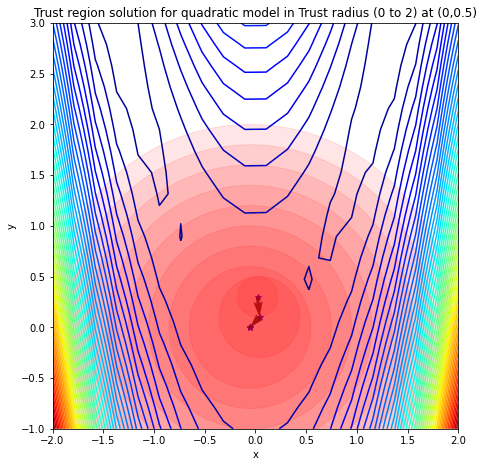

In [10]:
sol=[]
sol_x=[]
sol_y=[]
dis=[0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2]
for i in dis:
    x_val,iter_x,iter_y=Ttest_trust(m, jac1, hess1, [0, 0.5], initial_trust_radius=i,eta=0.2,rho_L=0.25,rho_H=0.75)
    sol.append(x_val)
    sol_x.append(iter_x)
    sol_y.append(iter_y)
# print(sol,sol_x,sol_y)
# niter.insert(0,0)
# step_l.insert(0,0)
# import pandas as pd 
dictionary = { 'xk': sol ,'Trust radius':dis}  
dataframe = pd.DataFrame(dictionary) 
dataframe.to_csv('Trust.csv')
pnt2=pd.read_csv('Trust.csv',index_col=0)
print("the detail of Trust region method   :\n")
print(pnt2)
'''contour plot of the model and solutions'''
x = np.linspace(-2,2,20)
y = np.linspace(-1,3,20)
X, Y = np.meshgrid(x, y)
Z = m(np.array([X, Y]))
np.shape(Z)
#Angles needed for quiver plot
anglesx = np.array(sol_x[1:]) - np.array(sol_x[:-1])
anglesy = np.array(sol_y[1:]) - np.array(sol_y[:-1])
# Contour plot
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
plt.contour(X,Y,Z, 50, cmap = 'jet')    
ax.scatter(sol_x,sol_y,color = 'b', marker = '*')
ax.quiver(sol_x[:-1], sol_y[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'k', alpha = .8)
ax.set_title('Trust region solution for quadratic model in Trust radius (0 to 2) at (0,0.5)')
ax.set_xlabel('x')
ax.set_ylabel('y')
for i in range (len(sol_x)):
    Drawing_colored_circle = plt.Circle(( sol_x[i] ,sol_y[i]),dis[i],color='red',alpha=0.1) 
    ax.set_aspect( 1 )
    ax.add_artist( Drawing_colored_circle)
plt.show()



**OBSERVATION**<br>
It is observed that to reach the optimum of the model mk trust region method takes less number of steps for initial guess (0,0.5) that (0,-1).